In [57]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.tree import DecisionTreeClassifier

In [58]:
dataset = pd.read_pickle("final_filled_n_10_dataset.pkl")
# fill with zeros
dataset['percent_of_oct_deaths_in_oct_and_sept'] = dataset['percent_of_oct_deaths_in_oct_and_sept'].fillna(0)
dataset['percent_of_oct_cases_in_oct_and_sept'] = dataset['percent_of_oct_cases_in_oct_and_sept'].fillna(0)
#######

# remove nans
# dataset = dataset.dropna()
# dataset = dataset.reset_index()
######
dataset

,countryterritoryCode,countriesAndTerritories,percent_of_oct_cases_in_oct_and_sept,percent_of_oct_deaths_in_oct_and_sept,cases_since_sept_per100k,deaths_since_sept_per100k,avg_temp,gdp_per_capita,pop_density,med_beds,physicians,pop_above_65,traffic_mortality,PM25
0,AFG,Afghanistan,0.791643,0.750000,13.776966,0.588827,-0.529930,-0.608033,-0.145669,-0.847835,-0.899005,-0.919981,-0.236727,1.433392
1,ALB,Albania,0.775718,0.696793,644.557922,11.982838,-0.696307,-0.422801,-0.113678,-0.017399,-0.352907,0.804558,-0.390003,-0.512630
2,DZA,Algeria,0.693112,0.655436,54.660466,1.516733,0.757437,-0.476434,-0.171979,-0.363414,-0.060184,-0.334016,0.608329,0.527157
3,AND,Andorra,0.822662,1.000000,6232.852436,30.192840,-1.060192,0.934097,-0.073932,-0.155805,0.879278,1.377475,-1.296369,-0.909422
4,AGO,Angola,0.787814,0.665116,33.778159,0.675563,0.323058,-0.513657,-0.167293,-0.744031,-0.936025,-0.981965,0.631831,0.200618
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
207,VNM,Vietnam,0.775934,0.000000,0.249839,0.003110,0.662299,-0.523521,0.022886,-0.121203,-0.578925,-0.185047,0.917945,0.061779
208,ESH,Western_Sahara,0.000000,0.000000,0.000000,0.000000,0.806940,-0.030961,0.193540,0.148145,-0.089468,0.240070,-0.303147,-0.403759
209,YEM,Yemen,0.310924,0.384615,0.408066,0.133736,0.564418,-0.590237,-0.147655,-0.778632,-0.755292,-0.877363,1.155011,1.108899
210,ZMB,Zambia,0.472342,0.318182,28.542580,0.369519,0.464823,-0.577896,-0.168213,-0.328812,-0.370194,-0.994471,0.955753,-0.048250


In [59]:
precip = pd.read_excel("cckp_historical_data_0.xls", sheet_name="Country_precipitationCRU")
precip = precip[['ISO_3DIGIT', 'Oct_precip', 'Nov_precip']]
dataset = pd.merge(left=dataset, right=precip, left_on='countryterritoryCode', right_on='ISO_3DIGIT').drop(columns=['ISO_3DIGIT'])
dataset

,countryterritoryCode,countriesAndTerritories,percent_of_oct_cases_in_oct_and_sept,percent_of_oct_deaths_in_oct_and_sept,cases_since_sept_per100k,deaths_since_sept_per100k,avg_temp,gdp_per_capita,pop_density,med_beds,physicians,pop_above_65,traffic_mortality,PM25,Oct_precip,Nov_precip
0,AFG,Afghanistan,0.791643,0.750000,13.776966,0.588827,-0.529930,-0.608033,-0.145669,-0.847835,-0.899005,-0.919981,-0.236727,1.433392,9.355273,15.409127
1,ALB,Albania,0.775718,0.696793,644.557922,11.982838,-0.696307,-0.422801,-0.113678,-0.017399,-0.352907,0.804558,-0.390003,-0.512630,105.261417,138.264167
2,DZA,Algeria,0.693112,0.655436,54.660466,1.516733,0.757437,-0.476434,-0.171979,-0.363414,-0.060184,-0.334016,0.608329,0.527157,7.328424,9.528861
3,AGO,Angola,0.787814,0.665116,33.778159,0.675563,0.323058,-0.513657,-0.167293,-0.744031,-0.936025,-0.981965,0.631831,0.200618,69.766698,144.510161
4,ARG,Argentina,0.631158,0.699723,2030.451752,60.372024,-0.902218,-0.245108,-0.172966,0.709233,1.261581,0.364074,-0.349129,-0.758396,47.715487,55.566664
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
166,VNM,Vietnam,0.775934,0.000000,0.249839,0.003110,0.662299,-0.523521,0.022886,-0.121203,-0.578925,-0.185047,0.917945,0.061779,236.874149,170.760018
167,ESH,Western_Sahara,0.000000,0.000000,0.000000,0.000000,0.806940,-0.030961,0.193540,0.148145,-0.089468,0.240070,-0.303147,-0.403759,3.053446,6.497009
168,YEM,Yemen,0.310924,0.384615,0.408066,0.133736,0.564418,-0.590237,-0.147655,-0.778632,-0.755292,-0.877363,1.155011,1.108899,4.632454,8.950662
169,ZMB,Zambia,0.472342,0.318182,28.542580,0.369519,0.464823,-0.577896,-0.168213,-0.328812,-0.370194,-0.994471,0.955753,-0.048250,32.033640,111.564148


In [60]:
train, test = train_test_split(dataset, test_size=0.5)

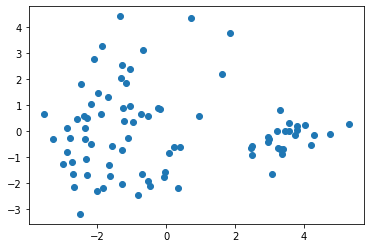

In [61]:
train_no_labels = train.drop(columns=['countryterritoryCode', 'countriesAndTerritories'])
train_no_labels_normed = pd.DataFrame(data=StandardScaler().fit_transform(train_no_labels), columns=train_no_labels.columns)
pca = PCA(n_components=2)
components = pca.fit_transform(train_no_labels_normed)
components_df = pd.DataFrame(data=components, columns=['x', 'y'])
plt.scatter(components_df.x, components_df.y)
plt.show()

In [62]:
n = 2
kmeans = KMeans(n_clusters=n)
kmeans.fit(train_no_labels)
train_clusters = kmeans.labels_

In [63]:
test_no_labels = test.drop(columns=['countryterritoryCode', 'countriesAndTerritories'])
knn_manhattan = KNeighborsClassifier(n_neighbors=n, metric='manhattan')
knn_minkowski = KNeighborsClassifier(n_neighbors=n)

test_kmeans = KMeans(n_clusters=n)
test_kmeans.fit(test_no_labels)
test_clusters = test_kmeans.labels_

knn_manhattan.fit(train_no_labels, train_clusters)
manhattan_classes = knn_manhattan.predict(test_no_labels)

print("manhattan acc: %f\n"%(accuracy_score(test_clusters, manhattan_classes)))

knn_minkowski.fit(train_no_labels, train_clusters)
minkowski_classes = knn_minkowski.predict(test_no_labels)

print("minkowski acc: %f\n"%(accuracy_score(test_clusters, minkowski_classes)))

manhattan acc: 1.000000

minkowski acc: 1.000000



In [64]:
clf = DecisionTreeClassifier(max_depth=3)
clf.fit(train_no_labels, train_clusters)

tree_classes = clf.predict(test_no_labels)

print("tree acc: %f\n"%(accuracy_score(test_clusters, tree_classes)))

tree acc: 1.000000



[Text(167.4, 163.07999999999998, 'X[2] <= 1044.228\ngini = 0.384\nsamples = 85\nvalue = [63, 22]'),
 Text(83.7, 54.360000000000014, 'gini = 0.0\nsamples = 63\nvalue = [63, 0]'),
 Text(251.10000000000002, 54.360000000000014, 'gini = 0.0\nsamples = 22\nvalue = [0, 22]')]

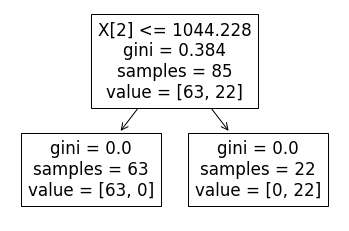

In [65]:
from sklearn.tree import plot_tree

plot_tree(clf)